<a href="https://colab.research.google.com/github/msinankhan/Finding-The-Ideal-Learning-Rate-In-CNN/blob/main/Finding_Ideal_Learning_Rate_in_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_dir = 'drive/MyDrive/CNN'
Shawarma_path = 'drive/MyDrive/CNN/Shawarma'
NOT_SHAWARMA_path= 'drive/MyDrive/CNN/NOT_SHAWARMA'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [8]:
train_datagen= ImageDataGenerator(rescale=1/255.,validation_split=0.3)

train_data=train_datagen.flow_from_directory(data_dir,batch_size=2,target_size=(200,200),class_mode='binary',seed=42,subset='training')

valid_data=train_datagen.flow_from_directory(data_dir,batch_size=2,target_size=(200,200),class_mode='binary',seed=42,subset='validation')

Found 14 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


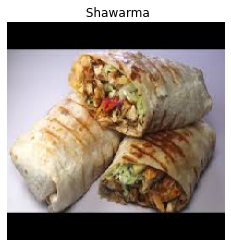

In [9]:
images,labels=train_data.next()

for i in range(1):
  image=images[i]
  label=labels[i]
  plt.axis(False)

  if label==1.0:
    label=' Shawarma'
  else:
    label='Not_shawarma'
  plt.title(label)
  plt.imshow(image)
  plt.show

In [10]:
image.shape

(200, 200, 3)

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Activation

In [13]:
model_1=Sequential([
      Conv2D(filters=2,kernel_size=3,activation='relu',input_shape=(200,200,3)),
      MaxPool2D(pool_size=1,padding='valid'),
      Conv2D(2,3,activation='relu'),
      MaxPool2D(pool_size=1,padding='valid'),
      Flatten(),
      Dense(1,activation='sigmoid')
])

model_1.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f8e57c2aed0>>

In [14]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history=model_1.fit(train_data,epochs=20,validation_data=valid_data)

Epoch 1/20
7/7 [==============================] - 16s 748ms/step - loss: 0.6934 - accuracy: 0.5714 - val_loss: 0.6917 - val_accuracy: 0.6667
Epoch 2/20
7/7 [==============================] - 0s 23ms/step - loss: 0.6350 - accuracy: 1.0000 - val_loss: 0.6695 - val_accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 0s 25ms/step - loss: 0.5117 - accuracy: 1.0000 - val_loss: 0.6281 - val_accuracy: 0.8333
Epoch 4/20
7/7 [==============================] - 0s 24ms/step - loss: 0.3482 - accuracy: 1.0000 - val_loss: 0.5860 - val_accuracy: 0.6667
Epoch 5/20
7/7 [==============================] - 0s 23ms/step - loss: 0.1966 - accuracy: 1.0000 - val_loss: 0.5969 - val_accuracy: 0.6667
Epoch 6/20
7/7 [==============================] - 0s 23ms/step - loss: 0.1023 - accuracy: 1.0000 - val_loss: 0.6179 - val_accuracy: 0.6667
Epoch 7/20
7/7 [==============================] - 0s 23ms/step - loss: 0.0568 - accuracy: 1.0000 - val_loss: 0.6243 - val_accuracy: 0.6667
Epoch 8/20
7/7 [=========

In [15]:
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4*10**(epochs/20))

In [23]:
model_2=Sequential([
      Conv2D(filters=2,kernel_size=3,activation='relu',input_shape=(200,200,3)),
      MaxPool2D(pool_size=1,padding='valid'),
      Conv2D(2,3,activation='relu'),
      MaxPool2D(pool_size=1,padding='valid'),
      Flatten(),
      Dense(1,activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


history_2=model_2.fit(train_data,
                    epochs=40,
                    validation_data=valid_data,
                    callbacks=[lr_scheduler])

Epoch 1/40
7/7 [==============================] - 1s 53ms/step - loss: 0.8587 - accuracy: 0.4286 - val_loss: 0.8095 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/40
7/7 [==============================] - 0s 25ms/step - loss: 0.7744 - accuracy: 0.5000 - val_loss: 0.6785 - val_accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/40
7/7 [==============================] - 0s 29ms/step - loss: 0.5737 - accuracy: 0.5714 - val_loss: 0.7187 - val_accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/40
7/7 [==============================] - 0s 28ms/step - loss: 0.5686 - accuracy: 0.7857 - val_loss: 0.7337 - val_accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/40
7/7 [==============================] - 0s 27ms/step - loss: 0.4018 - accuracy: 0.9286 - val_loss: 0.7564 - val_accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/40
7/7 [==============================] - 0s 28ms/step - loss: 0.3273 - accuracy: 0.9286 - val_loss: 0.6163 - val_accuracy: 0.6667 - lr: 1.7783e-04
Epoch 7/40
7/7 [==============================] - 0s 27ms/step -

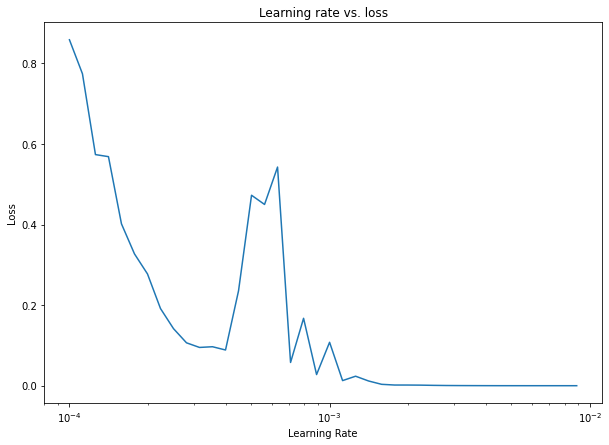

In [24]:
lrs = 1e-4 * (10 ** (np.arange(40)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

The ideal learning rate is the point which is close to the lowest point in the above graph
